# PHYS 434 Lab 1

### Joseph Bu

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

plt.rcParams["figure.figsize"] = (15,10)

## A little Statistics

### Visualizing the Standard Normal Distribution

In [2]:
d_norm = stats.norm.rvs(loc = 0, scale = 1, size = 100000)

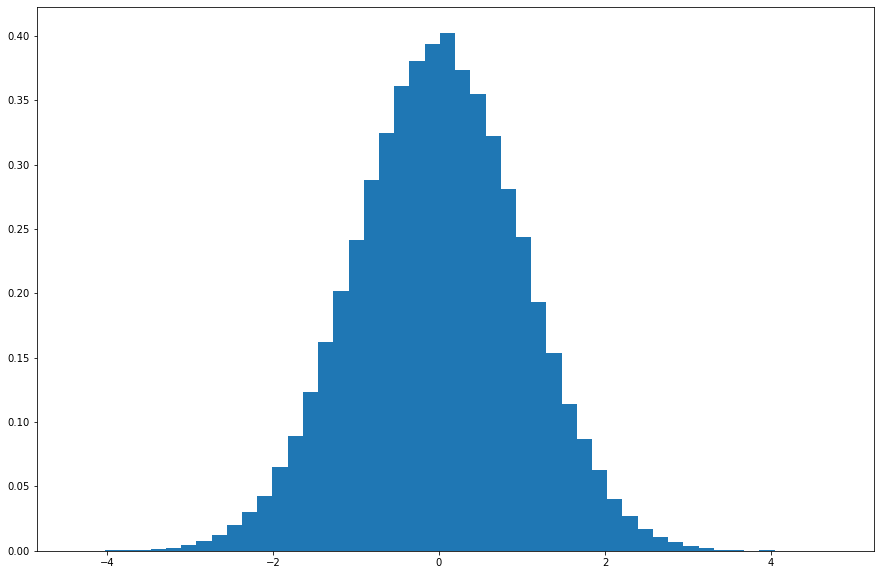

In [12]:
fig, ax = plt.subplots(1, 1)
ax.hist(d_norm,50, density=True)
plt.show()

### Integrating standard normal distribution and testing different sigmas to find different probabilities

In [4]:
p1 = stats.norm.cdf(1, loc = 0, scale = 1)
p2 = stats.norm.cdf(1, loc = 0, scale = 2)
p3 = stats.norm.cdf(1, loc = 0, scale = 5)
p4 = stats.norm.cdf(1, loc = 0, scale = 10)
p5 = stats.norm.cdf(1, loc = 0, scale = 15)


In [5]:
(p1, p2, p3, p4, p5)

(0.8413447460685429,
 0.6914624612740131,
 0.579259709439103,
 0.539827837277029,
 0.5265764643003651)

### Gathering sigma values from testing different known probabilities

In [6]:
sig1 = stats.norm.ppf(.8413, loc = 0, scale = 1) #1 sigma
sig2 = stats.norm.ppf(.9332, loc = 0, scale = 1) #1.5 sigma
sig3 = stats.norm.ppf(.9773, loc = 0, scale = 1) #2 sigma
sig4 = stats.norm.ppf(.9987 , loc = 0, scale = 1) #3 sigma
sig5 = stats.norm.ppf(.9998, loc = 0, scale = 1) #3.5 sigma


In [7]:
(sig1, sig2, sig3, sig4, sig5)

(0.9998150936147446,
 1.5000556030177843,
 2.000929388101571,
 3.011453758499792,
 3.540083799206175)

### Lognormal Distribution

$f(x,\sigma)=\frac{1}{x\sigma\sqrt{2\pi}}exp(-\frac{log^2(x)}{2\sigma^2})$ for $x>0, \sigma>0$

In [8]:
d_lognorm = stats.lognorm.rvs(s = 1, loc = 0, scale = 1, size = 100000)

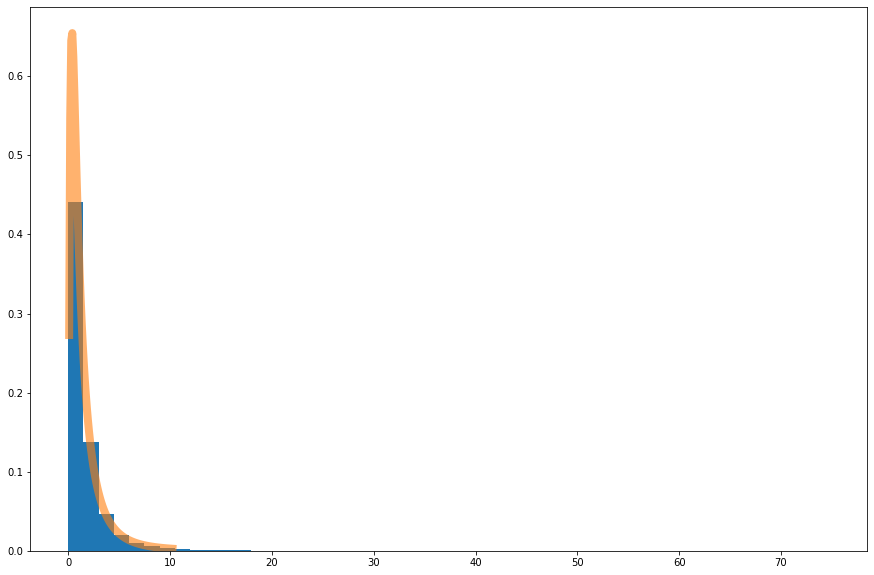

In [16]:
s = 1
fig, ax = plt.subplots(1, 1)
ax.hist(d_lognorm, 50, density=True)


x = np.linspace(stats.lognorm.ppf(0.01, s),
                stats.lognorm.ppf(0.99, s),100)
ax.plot(x, stats.lognorm.pdf(x, s), linewidth=8, alpha=0.6)
plt.show()

#### Hypothetical measurement

So for our hypothetical measurement, let us determine the probability of finding a measurement from the background giving a value of 8.21 or more. So the question is, wwhat is the probability of obtaining a value of 8.21 or more from the background signal?

$\int\limits_{8.21}^{infinity}\frac{1}{x\sigma\sqrt{2\pi}}exp(-\frac{log^2(x)}{2\sigma^2})dx$ for $x>0, \sigma>0$

In [28]:
measure = 8.21
prob = stats.lognorm.sf(x=8.21, s=1, loc=0, scale=1)
prob

0.017630299221718677

In [29]:
lognorm_sigma = -stats.norm.ppf(prob)
lognorm_sigma

2.105352923464337

So the probability of obtaining a measurement of 8.21 from only the background is 1.76%. This probabilitiy is about 2.1 sigma.

Now to test more hypothetical measurement values.

In [30]:
measure_1 = 5
measure_2 = 6.7
measure_3 = 10

prob_1 = stats.lognorm.sf(x=measure_1, s=1, loc=0, scale=1)
prob_2 = stats.lognorm.sf(x=measure_2, s=1, loc=0, scale=1)
prob_3 = stats.lognorm.sf(x=measure_3, s=1, loc=0, scale=1)

prob_1, prob_2, prob_3

(0.053760310451663136, 0.028578549358634634, 0.010651099341700122)

In [31]:
sigma_1 = -stats.norm.ppf(prob_1)
sigma_2 = -stats.norm.ppf(prob_2)
sigma_3 = -stats.norm.ppf(prob_3)

sigma_1, sigma_2, sigma_3

(1.6094379124341003, 1.902107526396921, 2.302585092994046)

## Non-continuous distributions: Binomial

The binomial distribution is used to obtain the probability of observing $n$ successes in $k$ trials, with the probability of success on a single trial $p$. So this distribution is used when there are two mutually exclusive outcomes of a trial.

The probability mass function for the Binomial distribution is:

$f(k) = {n\choose k}p^k(1-p)^{n-k}$ for $k\in \{0,1,...,n\}, 0 \leq p \geq 1$

In [46]:
d_binom1 = stats.binom.rvs(n=100, p=0.1, loc=0, size=100000)
d_binom2 = stats.binom.rvs(n=100, p=0.25, loc=0, size=100000)
d_binom3 = stats.binom.rvs(n=100, p=0.50, loc=0, size=100000)
d_binom4 = stats.binom.rvs(n=100, p=0.75, loc=0, size=100000)

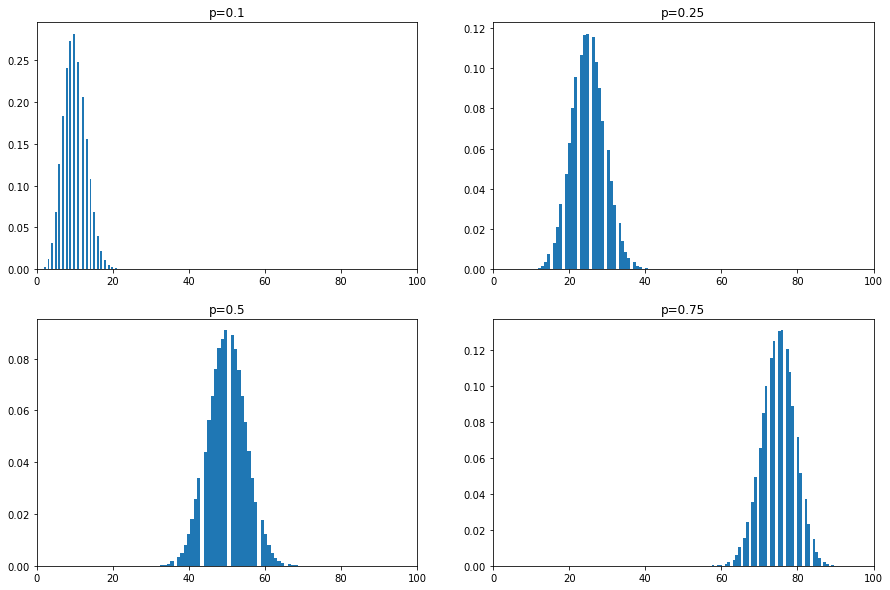

In [60]:
fig, ax = plt.subplots(2,2)

ax[0][0].hist(d_binom1, 50, density=True)
ax[0][1].hist(d_binom2, 50, density=True)
ax[1][0].hist(d_binom3, 50, density=True)
ax[1][1].hist(d_binom4, 50, density=True)

ax[0][0].set_xlim(0, 100)
ax[0][1].set_xlim(0, 100)
ax[1][0].set_xlim(0, 100)
ax[1][1].set_xlim(0, 100)

ax[0][0].set_title('p=0.1')
ax[0][1].set_title('p=0.25')
ax[1][0].set_title('p=0.5')
ax[1][1].set_title('p=0.75')

plt.show()

So now hypothetically, lets calculate the probability of the background producing a measurement of k=86 or higher from $p=0.75$

In [61]:
prob_binom = stats.binom.sf(k=86, n=100, p=0.75, loc=0)
prob_binom

0.0024578225428017815

In [64]:
sigma_binom = -stats.norm.ppf(prob_binom)
sigma_binom

2.8125102888379283

So the probabiliity of obtaining a measurement of 86 or higher when $p=0.75$ from the background is 0.024%

The sigma value for that probability is 2.8 sigma.

So beacuse the Binomial distributions, and resulting probabilities and sigmas are discrete, that means that the measurements we get from the experiments will also be discrete.